In [1]:
!pip install haversine
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline
from haversine import haversine, Unit
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv(r'uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.shape

(200000, 9)

In [4]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
r1null = df[df['dropoff_latitude'].isnull()]
print(r1null)

       Unnamed: 0                          key  fare_amount  \
87946    32736015  2013-07-02 03:51:57.0000001         24.1   

               pickup_datetime  pickup_longitude  pickup_latitude  \
87946  2013-07-02 03:51:57 UTC        -73.950581        40.779692   

       dropoff_longitude  dropoff_latitude  passenger_count  
87946                NaN               NaN                0  


In [7]:
r2null = df[df['dropoff_longitude'].isnull()]
print(r2null)

       Unnamed: 0                          key  fare_amount  \
87946    32736015  2013-07-02 03:51:57.0000001         24.1   

               pickup_datetime  pickup_longitude  pickup_latitude  \
87946  2013-07-02 03:51:57 UTC        -73.950581        40.779692   

       dropoff_longitude  dropoff_latitude  passenger_count  
87946                NaN               NaN                0  


In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df.shape

(199999, 9)

In [11]:
df['key'] = pd.to_datetime(df['key'])

In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199999 non-null  int64              
 1   key                199999 non-null  datetime64[ns]     
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(5), int64(2)
memory usage: 15.3 MB


In [14]:
print(df['pickup_latitude'].min())
print(df['pickup_longitude'].min())
print(df['dropoff_latitude'].min())
print(df['dropoff_longitude'].min())
print()
print(df['pickup_latitude'].max())
print(df['pickup_longitude'].max())
print(df['dropoff_latitude'].max())
print(df['dropoff_longitude'].max())

-74.01551500000001
-1340.64841
-881.9855130000001
-3356.6663

1644.421482
57.418457
872.6976279999999
1153.5726029999998


In [15]:
# US Latitude Longitude ranges from (24 to 49 Latitude) and (-66 to -125 Longitude)
# Delete latitude and longitude falling outside this range
lat = [24, 49]
lon = [-66, -125]

#delete = (df['pickup_latitude'] < 24) | (df['pickup_latitude'] > 49 )

df['invalid_pic_latitude'] = ((df['pickup_latitude'] < lat[0]) | (df['pickup_latitude'] > lat[1]))
df['invalid_pic_longitude'] = ((df['pickup_longitude'] > lon[0]) | (df['pickup_longitude'] < lon[1]))
df['invalid_drop_latitude'] = ((df['dropoff_latitude'] < lat[0]) | (df['dropoff_latitude'] > lat[1]))
df['invalid_drop_longitude'] = ((df['dropoff_longitude'] > lon[0]) | (df['dropoff_longitude'] < lon[1]))

df['invalid_pic_latitude'] = df['invalid_pic_latitude'].astype(int)
df['invalid_pic_longitude'] = df['invalid_pic_longitude'].astype(int)
df['invalid_drop_latitude'] = df['invalid_drop_latitude'].astype(int)
df['invalid_drop_longitude'] = df['invalid_drop_longitude'].astype(int)

In [16]:
df[(df['invalid_pic_latitude']==1) | (df['invalid_pic_longitude']==1) | (df['invalid_drop_latitude']==1) | (df['invalid_drop_longitude']==1)].head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,invalid_pic_latitude,invalid_pic_longitude,invalid_drop_latitude,invalid_drop_longitude
7,44195482,2012-12-11 13:52:00.000000290,2.5,2012-12-11 13:52:00+00:00,0.0,0.0,0.0,0.0,1,1,1,1,1
11,6379048,2011-05-23 22:15:00.000000860,8.5,2011-05-23 22:15:00+00:00,0.0,0.0,0.0,0.0,1,1,1,1,1
65,21993993,2014-05-05 19:27:00.000000340,6.0,2014-05-05 19:27:00+00:00,0.0,0.0,0.0,0.0,1,1,1,1,1
92,1454546,2011-12-02 14:07:00.000000207,6.1,2011-12-02 14:07:00+00:00,0.0,0.0,0.0,0.0,1,1,1,1,1
120,17358122,2010-08-20 19:39:48.000000300,6.5,2010-08-20 19:39:48+00:00,0.0,0.0,0.0,0.0,1,1,1,1,1


In [17]:
df = df[(df['invalid_pic_latitude']!=1)]
df = df[(df['invalid_pic_longitude']!=1)]
df = df[(df['invalid_drop_latitude']!=1)]
df = df[(df['invalid_drop_longitude']!=1)]

In [18]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,invalid_pic_latitude,invalid_pic_longitude,invalid_drop_latitude,invalid_drop_longitude
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,0,0,0,0
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,0,0,0,0
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0,0,0,0
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,0,0,0,0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,0,0,0,0


In [19]:
df['distance_km'] = df.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']),
                                                   unit=Unit.KILOMETERS), axis=1)

In [20]:
#df['distance_mi'] = df.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']),
#                                                   unit=Unit.MILES), axis=1)

In [21]:
print(df['pickup_latitude'].min())
print(df['pickup_longitude'].min())
print(df['dropoff_latitude'].min())
print(df['dropoff_longitude'].min())
print()
print(df['pickup_latitude'].max())
print(df['pickup_longitude'].max())
print(df['dropoff_latitude'].max())
print(df['dropoff_longitude'].max())

32.005119
-89.93333299999999
37.53309
-75.458978633981

48.01876
-67.37035999999999
45.031598
-69.046738


<Axes: xlabel='distance_km', ylabel='fare_amount'>

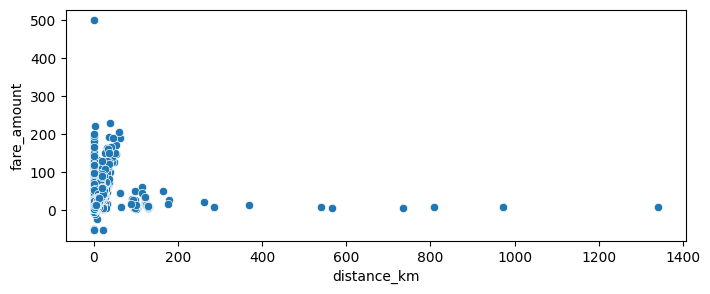

In [22]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'distance_km', y = 'fare_amount')

In [23]:
df.drop(columns='invalid_pic_latitude', inplace=True)
df.drop(columns='invalid_pic_longitude', inplace=True)
df.drop(columns='invalid_drop_latitude', inplace=True)
df.drop(columns='invalid_drop_longitude', inplace=True)

In [24]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456


In [25]:
df.shape

(195860, 10)

In [26]:
#distance, duration, traffic conditions, time of day, and demand

Peak Traffic Hours (Based on Uber Pickups):
 Hour
0     0.039207
1     0.029506
2     0.022097
3     0.016282
4     0.011809
5     0.009818
6     0.020704
7     0.036148
8     0.045456
9     0.046717
10    0.044833
11    0.047095
12    0.049709
13    0.050077
14    0.048897
15    0.048009
16    0.041443
17    0.048627
18    0.060416
19    0.063055
20    0.058736
21    0.057286
22    0.055116
23    0.048958
dtype: float64


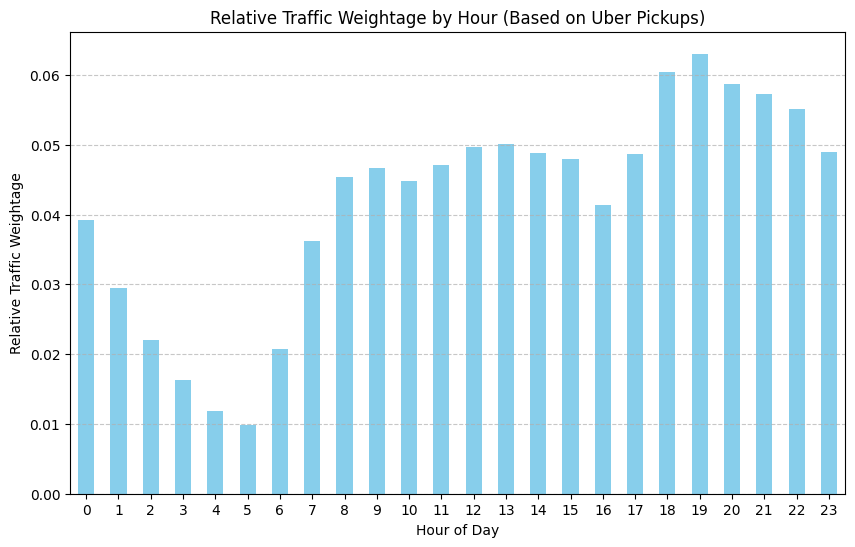

In [27]:
df['Hour'] = df['pickup_datetime'].dt.hour
hourly_pickups = df.groupby('Hour').size()
normalized_traffic_weightage = hourly_pickups / hourly_pickups.sum()
df['Traffic_Weitage'] = df['Hour'].map(normalized_traffic_weightage)
print("Peak Traffic Hours (Based on Uber Pickups):\n", normalized_traffic_weightage)

plt.figure(figsize=(10, 6))
normalized_traffic_weightage.plot(kind='bar', color='skyblue')
plt.title('Relative Traffic Weightage by Hour (Based on Uber Pickups)')
plt.xlabel('Hour of Day')
plt.ylabel('Relative Traffic Weightage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,Hour,Traffic_Weitage
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683325,19,0.063055
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457593,20,0.058736
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384,21,0.057286
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661686,8,0.045456
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456,17,0.048627


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195860 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         195860 non-null  int64              
 1   key                195860 non-null  datetime64[ns]     
 2   fare_amount        195860 non-null  float64            
 3   pickup_datetime    195860 non-null  datetime64[ns, UTC]
 4   pickup_longitude   195860 non-null  float64            
 5   pickup_latitude    195860 non-null  float64            
 6   dropoff_longitude  195860 non-null  float64            
 7   dropoff_latitude   195860 non-null  float64            
 8   passenger_count    195860 non-null  int64              
 9   distance_km        195860 non-null  float64            
 10  Hour               195860 non-null  int32              
 11  Traffic_Weitage    195860 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime

<Axes: xlabel='distance_km', ylabel='fare_amount'>

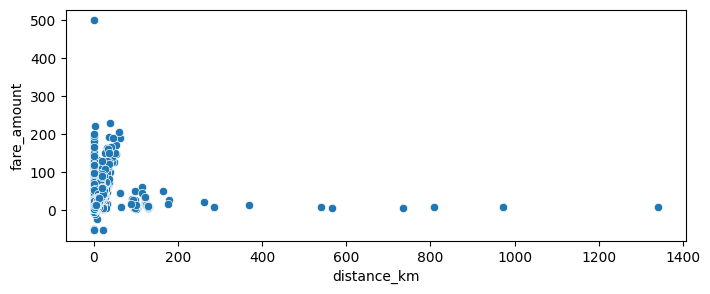

In [30]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'distance_km', y = 'fare_amount')

In [31]:
# Deleting passenger count which is greater than 6
condition = df['passenger_count'] > 6
df = df[~condition]
df.shape

(195859, 12)

In [32]:
# Deleting distance_km which is greater than 2000
condition = df['distance_km'] > 2000
df = df[~condition]
df.shape

(195859, 12)

In [33]:
# Deleting fare_amount which is less than 10
condition = df['fare_amount'] <= 10
df = df[~condition]
df.shape

(73426, 12)

In [34]:
# Deleting 0 passenger count
condition = df['passenger_count'] == 0
df = df[~condition]
df.shape

(73216, 12)

In [35]:
# Deleting 0 distance_km
condition = df['distance_km'] == 0
df = df[~condition]
df.shape

(72688, 12)

<Axes: xlabel='distance_km', ylabel='fare_amount'>

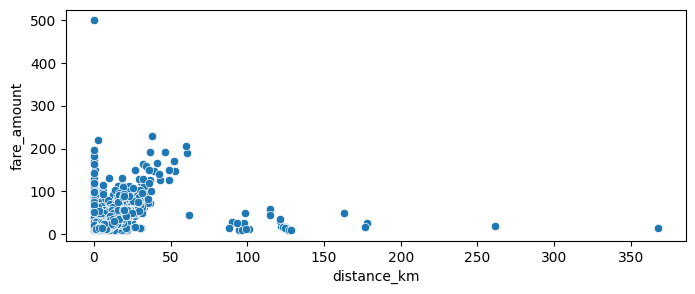

In [36]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'distance_km', y = 'fare_amount')

<Axes: xlabel='distance_km', ylabel='fare_amount'>

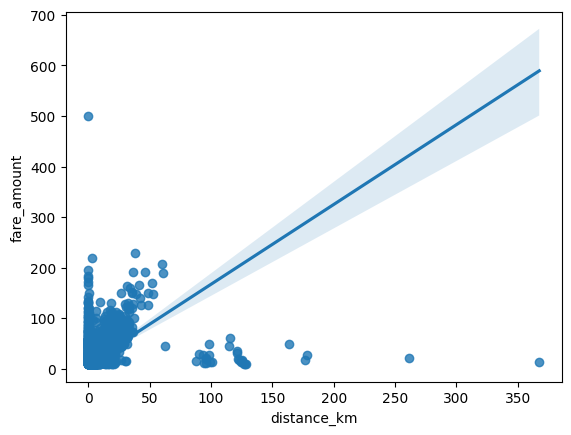

In [37]:
sns.regplot(x='distance_km', y='fare_amount', data=df)

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

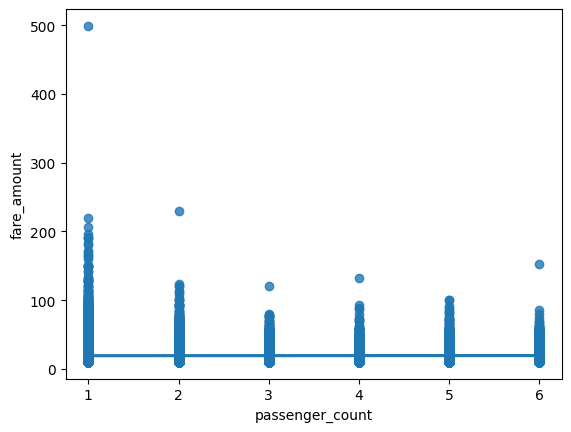

In [38]:
sns.regplot(x='passenger_count', y='fare_amount', data=df)

In [39]:
df.describe()

,Unnamed: 0,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,Hour,Traffic_Weitage
count,7.268800e+04,72688,72688.000000,72688.000000,72688.000000,72688.000000,72688.000000,72688.000000,72688.000000,72688.000000,72688.000000
mean,2.769841e+07,2012-06-29 13:26:22.654358784,19.201118,-73.967812,40.746885,-73.966096,40.746809,1.711094,6.168671,13.315320,0.046653
min,1.000000e+00,2009-01-01 01:59:17.000000100,10.100000,-75.426904,39.610299,-75.458979,37.533090,1.000000,0.000084,0.000000,0.009818
25%,1.383361e+07,2010-12-09 08:46:12.000000512,12.000000,-73.993040,40.729664,-73.991539,40.723875,1.000000,3.287484,9.000000,0.044833
50%,2.772307e+07,2012-09-11 22:19:00.000000256,14.500000,-73.981861,40.751772,-73.978227,40.751926,1.000000,4.744799,14.000000,0.048627
75%,4.153312e+07,2014-01-30 08:35:55.750000384,21.000000,-73.962867,40.768650,-73.955159,40.769141,2.000000,7.268739,19.000000,0.055116
max,5.542167e+07,2015-06-30 23:40:39.000000100,499.000000,-71.896038,42.478467,-71.718700,42.464187,6.000000,367.442653,23.000000,0.063055
std,1.600440e+07,NaN,12.160614,0.053375,0.035029,0.053175,0.045432,1.321225,5.321041,6.706105,0.012063


In [40]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,Hour,Traffic_Weitage
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036384,21,0.057286
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475456,17,0.048627
6,48725865,2014-10-12 07:04:00.000000200,24.5,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,5,11.731031,7,0.036148
9,50611056,2012-03-29 19:06:00.000000273,12.5,2012-03-29 19:06:00+00:00,-74.001065,40.741787,-73.963040,40.775012,1,4.889424,19,0.063055
13,13012786,2011-06-25 11:19:00.000000102,10.9,2011-06-25 11:19:00+00:00,-73.953352,40.767382,-73.972510,40.796137,1,3.581256,11,0.047095


In [41]:
df.drop(columns=['Unnamed: 0', 'key', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], inplace=True)
df.head()

,fare_amount,pickup_datetime,passenger_count,distance_km,Hour,Traffic_Weitage
2,12.9,2009-08-24 21:45:00+00:00,1,5.036384,21,0.057286
4,16.0,2014-08-28 17:47:00+00:00,5,4.475456,17,0.048627
6,24.5,2014-10-12 07:04:00+00:00,5,11.731031,7,0.036148
9,12.5,2012-03-29 19:06:00+00:00,1,4.889424,19,0.063055
13,10.9,2011-06-25 11:19:00+00:00,1,3.581256,11,0.047095


In [42]:
#sns.pairplot(df)

<Axes: xlabel='distance_km', ylabel='fare_amount'>

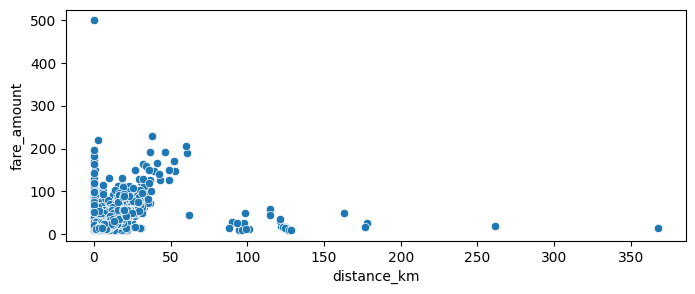

In [43]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'distance_km', y = 'fare_amount')

In [44]:
# Deleting outliers of distance>50 and fare_amount < 100.  They are outliers
condition = (df['distance_km'] > 50) & (df['fare_amount'] < 100)
df = df[~condition]

In [45]:
# Deleting outliers of fare_amount>300 as its distance from the above chart is close to 0
condition = df['fare_amount'] > 300
df = df[~condition]

<Axes: xlabel='distance_km', ylabel='fare_amount'>

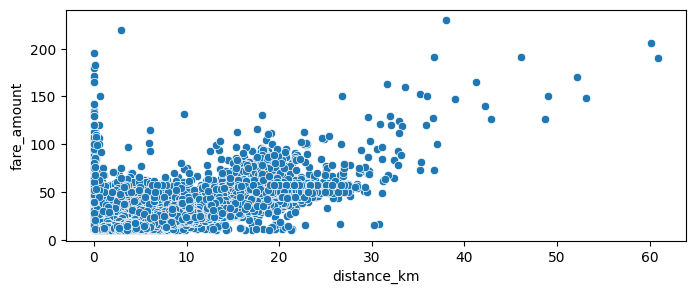

In [46]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'distance_km', y = 'fare_amount')

In [47]:
df['Fare_Km'] = df['fare_amount']/df['distance_km']

In [48]:
df.head()

,fare_amount,pickup_datetime,passenger_count,distance_km,Hour,Traffic_Weitage,Fare_Km
2,12.9,2009-08-24 21:45:00+00:00,1,5.036384,21,0.057286,2.561361
4,16.0,2014-08-28 17:47:00+00:00,5,4.475456,17,0.048627,3.575055
6,24.5,2014-10-12 07:04:00+00:00,5,11.731031,7,0.036148,2.088478
9,12.5,2012-03-29 19:06:00+00:00,1,4.889424,19,0.063055,2.556539
13,10.9,2011-06-25 11:19:00+00:00,1,3.581256,11,0.047095,3.043625


In [49]:
df.sort_values(by='Fare_Km', ascending=False).head()

,fare_amount,pickup_datetime,passenger_count,distance_km,Hour,Traffic_Weitage,Fare_Km
11301,113.0,2013-12-06 02:17:00+00:00,2,0.000169,2,0.022097,667984.103674
14116,52.0,2014-01-25 03:31:46+00:00,1,0.000084,3,0.016282,617216.290511
198655,52.0,2014-08-31 20:02:06+00:00,1,0.000084,20,0.058736,616348.773783
1531,50.0,2009-05-28 19:40:00+00:00,1,0.000084,19,0.063055,593853.871246
163148,45.0,2012-04-11 22:34:15+00:00,1,0.000084,22,0.055116,534246.314443


In [50]:
# Deleting fare_km>50 and distance_km<0.5. They are outliers
condition = (df['Fare_Km'] > 50) & (df['distance_km'] < 0.5)
df = df[~condition]
df.shape

(72070, 7)

<Axes: xlabel='distance_km', ylabel='fare_amount'>

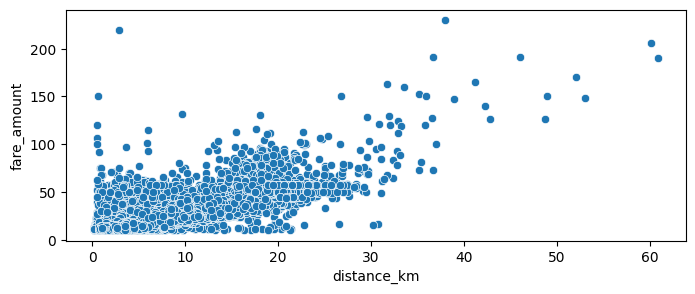

In [51]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'distance_km', y = 'fare_amount')

In [52]:
# Deleting fare_amount>100 and distance_km<10. They are outliers
condition=(df['fare_amount'] > 100) & (df['distance_km'] < 10)
df = df[~condition]

In [53]:
# Deleting fare_amount>150 and distance_km>50. They are outliers
condition = (df['fare_amount'] > 150) & (df['distance_km'] > 50)
df = df[~condition]

<Axes: xlabel='distance_km', ylabel='fare_amount'>

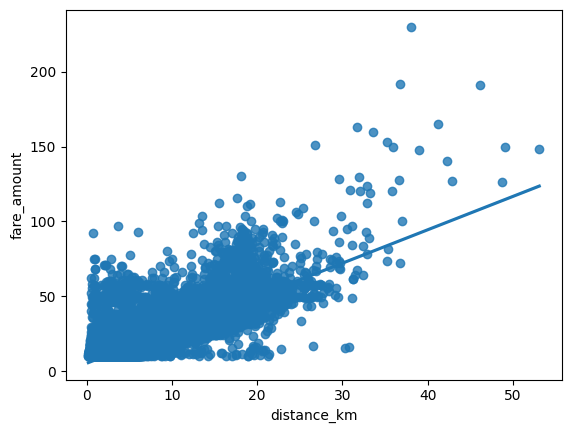

In [54]:
sns.regplot(x='distance_km', y='fare_amount', data=df)

<Axes: xlabel='distance_km', ylabel='fare_amount'>

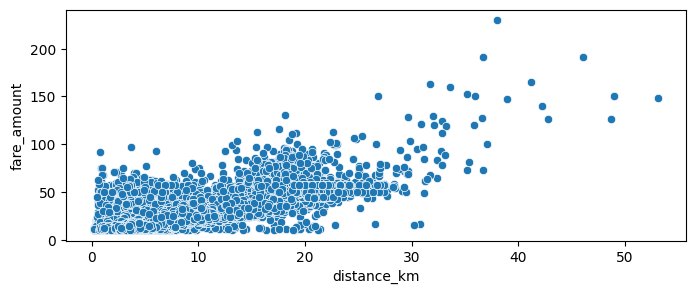

In [55]:
plt.figure(figsize = (8,3))
sns.scatterplot(data = df, x = 'distance_km', y = 'fare_amount')

In [56]:
df.corr()

,fare_amount,pickup_datetime,passenger_count,distance_km,Hour,Traffic_Weitage,Fare_Km
fare_amount,1.000000,0.095435,0.007221,0.865596,-0.020000,-0.055798,-0.009215
pickup_datetime,0.095435,1.000000,0.007534,-0.050902,0.006373,0.007550,0.113492
passenger_count,0.007221,0.007534,1.000000,0.001854,0.012281,0.008014,0.010614
distance_km,0.865596,-0.050902,0.001854,1.000000,-0.041984,-0.104752,-0.310038
Hour,-0.020000,0.006373,0.012281,-0.041984,1.000000,0.777955,0.026051
Traffic_Weitage,-0.055798,0.007550,0.008014,-0.104752,0.777955,1.000000,0.061969
Fare_Km,-0.009215,0.113492,0.010614,-0.310038,0.026051,0.061969,1.000000


<Axes: >

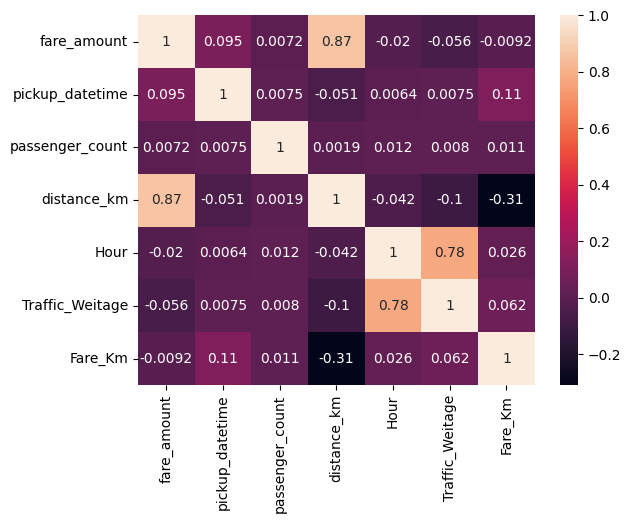

In [57]:
sns.heatmap(df.corr(), annot=True)

In [58]:
# Create X & y
# Create train and test datasets (70-30)%
# Train the model on the training set (learn the coefficients)
# Evaluate the model

In [59]:
df.head()

,fare_amount,pickup_datetime,passenger_count,distance_km,Hour,Traffic_Weitage,Fare_Km
2,12.9,2009-08-24 21:45:00+00:00,1,5.036384,21,0.057286,2.561361
4,16.0,2014-08-28 17:47:00+00:00,5,4.475456,17,0.048627,3.575055
6,24.5,2014-10-12 07:04:00+00:00,5,11.731031,7,0.036148,2.088478
9,12.5,2012-03-29 19:06:00+00:00,1,4.889424,19,0.063055,2.556539
13,10.9,2011-06-25 11:19:00+00:00,1,3.581256,11,0.047095,3.043625


In [60]:
df.drop(labels='pickup_datetime', axis=1, inplace=True)

In [61]:
df.head()

,fare_amount,passenger_count,distance_km,Hour,Traffic_Weitage,Fare_Km
2,12.9,1,5.036384,21,0.057286,2.561361
4,16.0,5,4.475456,17,0.048627,3.575055
6,24.5,5,11.731031,7,0.036148,2.088478
9,12.5,1,4.889424,19,0.063055,2.556539
13,10.9,1,3.581256,11,0.047095,3.043625


In [62]:
X = df.drop(labels='fare_amount', axis=1)
y = df['fare_amount']

In [63]:
X.head()

,passenger_count,distance_km,Hour,Traffic_Weitage,Fare_Km
2,1,5.036384,21,0.057286,2.561361
4,5,4.475456,17,0.048627,3.575055
6,5,11.731031,7,0.036148,2.088478
9,1,4.889424,19,0.063055,2.556539
13,1,3.581256,11,0.047095,3.043625


In [64]:
y.head()

2     12.9
4     16.0
6     24.5
9     12.5
13    10.9
Name: fare_amount, dtype: float64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [66]:
print(len(X_train))
print(len(X_test))

50441
21618


In [67]:
print(len(y_train))
print(len(y_test))

50441
21618


### Numerical Predictors - statsmodels
#### Model 1

In [68]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'fare_amount' using 'passenger_count'
# Note: Using all the data for analytical purpose but when building models generally only training data is used
lrmodel_1 = smf.ols('fare_amount ~ passenger_count', data=df)
lrmodel_1 = lrmodel_1.fit()
print(lrmodel_1.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.757
Date:                Mon, 22 Apr 2024   Prob (F-statistic):             0.0526
Time:                        17:50:54   Log-Likelihood:            -2.7900e+05
No. Observations:               72059   AIC:                         5.580e+05
Df Residuals:                   72057   BIC:                         5.580e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          18.9350      0.071    2

#### Model 2

In [69]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'fare_amount' using 'distance_km'
lrmodel_2 = smf.ols('fare_amount ~ distance_km', data=df)
lrmodel_2 = lrmodel_2.fit()
print(lrmodel_2.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                 2.153e+05
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:50:54   Log-Likelihood:            -2.2916e+05
No. Observations:               72059   AIC:                         4.583e+05
Df Residuals:                   72057   BIC:                         4.583e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.2994      0.037    144.374      

#### Model 3

In [70]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'fare_amount' using 'Hour'
lrmodel_3 = smf.ols('fare_amount ~ Hour', data=df)
lrmodel_3 = lrmodel_3.fit()
print(lrmodel_3.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     28.84
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           7.90e-08
Time:                        17:50:54   Log-Likelihood:            -2.7898e+05
No. Observations:               72059   AIC:                         5.580e+05
Df Residuals:                   72057   BIC:                         5.580e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5056      0.096    202.544      0.0

#### Model 4

In [71]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'fare_amount' using 'Traffic_Weitage'
lrmodel_4 = smf.ols('fare_amount ~ Traffic_Weitage', data=df)
lrmodel_4 = lrmodel_4.fit()
print(lrmodel_4.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     225.0
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           8.58e-51
Time:                        17:50:54   Log-Likelihood:            -2.7888e+05
No. Observations:               72059   AIC:                         5.578e+05
Df Residuals:                   72057   BIC:                         5.578e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          21.5546      0.173    1

#### Model 5

In [72]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'fare_amount' using 'Fare_Km'
lrmodel_5 = smf.ols('fare_amount ~ Fare_Km', data=df)
lrmodel_5 = lrmodel_5.fit()
print(lrmodel_5.summary())

                            OLS Regression Results                            
Dep. Variable:            fare_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.120
Date:                Mon, 22 Apr 2024   Prob (F-statistic):             0.0134
Time:                        17:50:54   Log-Likelihood:            -2.7899e+05
No. Observations:               72059   AIC:                         5.580e+05
Df Residuals:                   72057   BIC:                         5.580e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.1821      0.071    271.062      0.0

### Numerical Predictors - sklearn
#### Model 1

In [73]:
lr_model_1 = LinearRegression()
lr_model_1 = lr_model_1.fit(X=X_train[['passenger_count']], y=y_train)

<Axes: xlabel='passenger_count', ylabel='fare_amount'>

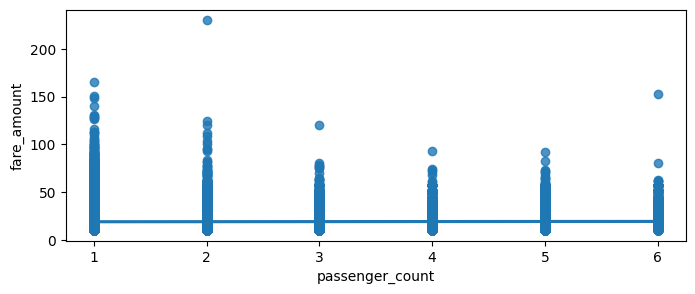

In [74]:
plt.figure(figsize = (8,3))
sns.regplot(x=X_train[['passenger_count']], y=y_train)

In [75]:
# Look at the intercept and coefficient values
print('Intercept :', lr_model_1.intercept_)
print('Coefficient :', lr_model_1.coef_[0])

Intercept : 18.92385919144963
Coefficient : 0.06348161054262817


##### The coefficient obtained here as well as the consequent linear model are almost the same as the one we saw before

In [76]:
# Obtain predictions on the testing data set
lr_model_1.predict(X_test[['passenger_count']])

array([18.9873408 , 18.9873408 , 18.9873408 , ..., 19.05082241,
       18.9873408 , 18.9873408 ])

In [77]:
# General predictive performance of the model
pd.DataFrame(index = X_test.index, data = {'Truths': y_test,
                                           'Predictions': lr_model_1.predict(X_test[['passenger_count']])}).head()

,Truths,Predictions
96575,11.3,18.987341
179699,19.5,18.987341
52608,10.5,18.987341
152591,15.7,18.987341
17045,11.5,18.987341


In [78]:
# Summarize the performance of the model on the test data using RMSE and MAPE
y_pred_lr_list = lr_model_1.predict(X_test[['passenger_count']])
rmse = np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred_lr_list))
mape = np.mean(np.abs(y_test - y_pred_lr_list)/y_test)*100

rmse = np.round(rmse,2)
mape = np.round(mape,2)

performance_df = pd.DataFrame(index=[0],
                              data = {'Model': 'SLR passenger_count', 'RMSE': rmse, 'MAPE': mape})
performance_df.set_index(keys='Model', inplace=True)
performance_df

,RMSE,MAPE
Model,,
SLR passenger_count,11.73,43.5


#### Model 2

In [79]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'fare_amount' using 'passenger_count'
# Note: Using only the training data
lr_model_2 = LinearRegression()
lr_model_2 = lr_model_2.fit(X_train[['distance_km']], y_train)

<Axes: xlabel='distance_km', ylabel='fare_amount'>

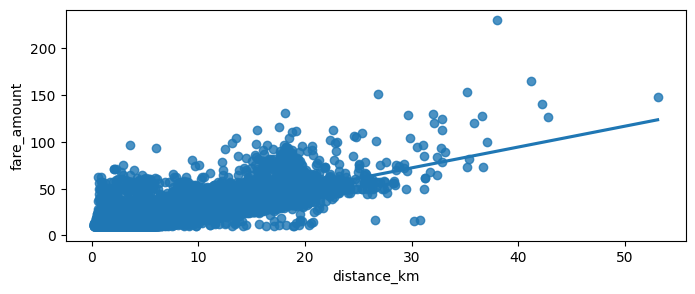

In [80]:
# Create a regression plot for this model
plt.figure(figsize = (8,3))
sns.regplot(x = X_train[['distance_km']], y=y_train)

In [81]:
# Look at the intercept and coefficient values
print('Intercept: ', lr_model_2.intercept_)
print('Coefficient: ', lr_model_2.coef_[0])

Intercept:  5.320648742653468
Coefficient:  2.227040821706897


In [82]:
# Summarize the performance of the model on the test data using RMSE and MAPE
y_pred_lr_list = lr_model_2.predict(X_test[['distance_km']])
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_lr_list))
mape = np.mean(np.abs(y_test-y_pred_lr_list)/y_test) * 100

rmse = np.round(rmse,2)
mape = np.round(mape,2)

performance_df_temp = pd.DataFrame(index=[0],
                                  data={'Model': 'SLR distance_km', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys='Model', inplace=True)
performance_df = pd.concat(objs=[performance_df, performance_df_temp])
performance_df

,RMSE,MAPE
Model,,
SLR passenger_count,11.73,43.50
SLR distance_km,5.88,19.85


### Model 3

In [83]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'fare_amount' using 'passenger_count'
# Note: Using only the training data
lr_model_3 = LinearRegression()
lr_model_3 = lr_model_3.fit(X_train[['Hour']], y_train)

<Axes: xlabel='Hour', ylabel='fare_amount'>

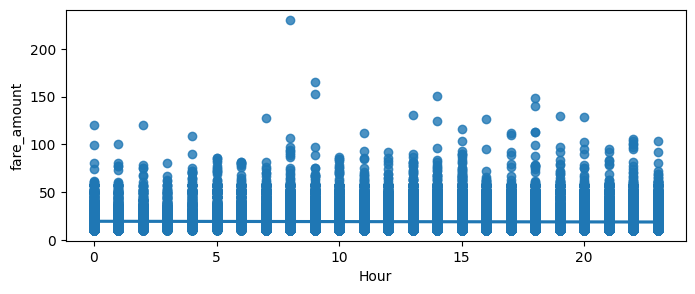

In [84]:
# Create a regression plot for this model
plt.figure(figsize = (8,3))
sns.regplot(x = X_train[['Hour']], y=y_train)

In [85]:
# Look at the intercept and coefficient values
print('Intercept: ', lr_model_3.intercept_)
print('Coefficient: ', lr_model_3.coef_[0])

Intercept:  19.46661084810246
Coefficient:  -0.032606531128210686


In [86]:
# Summarize the performance of the model on the test data using RMSE and MAPE
y_pred_lr_list = lr_model_3.predict(X_test[['Hour']])
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_lr_list))
mape = np.mean(np.abs(y_test-y_pred_lr_list)/y_test) * 100

rmse = np.round(rmse,2)
mape = np.round(mape,2)

performance_df_temp = pd.DataFrame(index=[0],
                                  data={'Model': 'SLR Hour', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys='Model', inplace=True)
performance_df = pd.concat(objs=[performance_df, performance_df_temp])
performance_df

,RMSE,MAPE
Model,,
SLR passenger_count,11.73,43.50
SLR distance_km,5.88,19.85
SLR Hour,11.73,43.46


### Model 4

In [87]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'fare_amount' using 'passenger_count'
# Note: Using only the training data
lr_model_4 = LinearRegression()
lr_model_4 = lr_model_4.fit(X_train[['Traffic_Weitage']], y_train)

<Axes: xlabel='Traffic_Weitage', ylabel='fare_amount'>

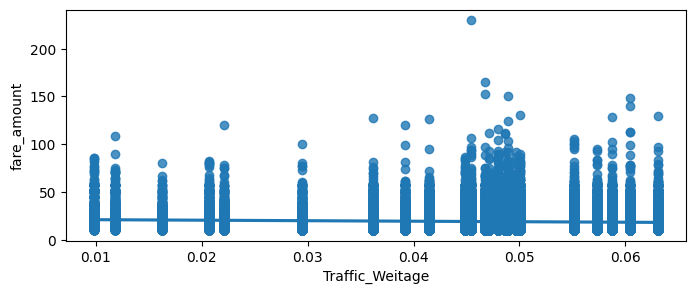

In [88]:
# Create a regression plot for this model
plt.figure(figsize = (8,3))
sns.regplot(x = X_train[['Traffic_Weitage']], y=y_train)

In [89]:
# Look at the intercept and coefficient values
print('Intercept: ', lr_model_4.intercept_)
print('Coefficient: ', lr_model_4.coef_[0])

Intercept:  21.516912194962305
Coefficient:  -53.23144347261573


In [90]:
# Summarize the performance of the model on the test data using RMSE and MAPE
y_pred_lr_list = lr_model_4.predict(X_test[['Traffic_Weitage']])
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_lr_list))
mape = np.mean(np.abs(y_test-y_pred_lr_list)/y_test) * 100

rmse = np.round(rmse,2)
mape = np.round(mape,2)

performance_df_temp = pd.DataFrame(index=[0],
                                  data={'Model': 'SLR Traffic_Weitage', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys='Model', inplace=True)
performance_df = pd.concat(objs=[performance_df, performance_df_temp])
performance_df

,RMSE,MAPE
Model,,
SLR passenger_count,11.73,43.50
SLR distance_km,5.88,19.85
SLR Hour,11.73,43.46
SLR Traffic_Weitage,11.71,43.33


### Model 5

In [91]:
# Create and train a linear regression model for the data and view its summary
# Note: The objective is to predict 'fare_amount' using 'passenger_count'
# Note: Using only the training data
lr_model_5 = LinearRegression()
lr_model_5 = lr_model_5.fit(X_train[['Fare_Km']], y_train)

<Axes: xlabel='Fare_Km', ylabel='fare_amount'>

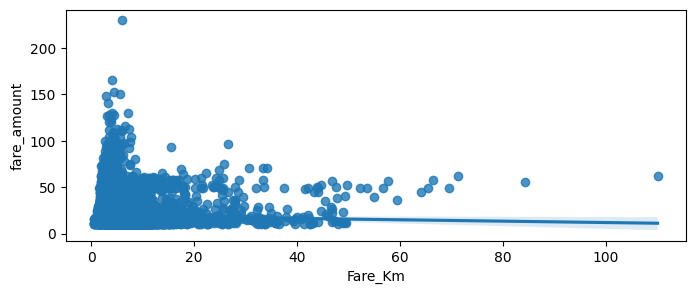

In [92]:
# Create a regression plot for this model
plt.figure(figsize = (8,3))
sns.regplot(x = X_train[['Fare_Km']], y=y_train)

In [93]:
# Look at the intercept and coefficient values
print('Intercept: ', lr_model_5.intercept_)
print('Coefficient: ', lr_model_5.coef_[0])

Intercept:  19.31016779649253
Coefficient:  -0.07445089197929841


In [94]:
# Summarize the performance of the model on the test data using RMSE and MAPE
y_pred_lr_list = lr_model_5.predict(X_test[['Fare_Km']])
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_lr_list))
mape = np.mean(np.abs(y_test-y_pred_lr_list)/y_test) * 100

rmse = np.round(rmse,2)
mape = np.round(mape,2)

performance_df_temp = pd.DataFrame(index=[0],
                                  data={'Model': 'SLR Fare_Km', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys='Model', inplace=True)
performance_df = pd.concat(objs=[performance_df, performance_df_temp])
performance_df

,RMSE,MAPE
Model,,
SLR passenger_count,11.73,43.50
SLR distance_km,5.88,19.85
SLR Hour,11.73,43.46
SLR Traffic_Weitage,11.71,43.33
SLR Fare_Km,11.73,43.43


### Out of 5 different models, distance_km has the least RMSE and MAPE values.  It seems that distance_km is a good predictor of fare_amount